In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import modules.ols_assumptions_check 
import modules.statsmodel_original

In [2]:
# create data for Linear Regression:

X = np.random.rand(10000,5)
m = np.random.randint(low = 100, 
                      high = 2000,size = (5,1))  

q = np.random.rand(1)
y = (X @ m) + 100

noise = np.random.randn(y.shape[0], y.shape[1])
y = y + noise

In [3]:
df = pd.DataFrame(np.concatenate((y, X), axis=1))
df.head()

,0,1,2,3,4,5
0,2606.635783,0.789129,0.282870,0.505255,0.233303,0.090844
1,4572.818786,0.452699,0.950004,0.545254,0.951411,0.420423
2,3307.168490,0.041352,0.314786,0.518187,0.945928,0.211122
3,4018.229978,0.640670,0.060054,0.863443,0.725814,0.197816
4,2876.850078,0.080452,0.845388,0.226965,0.065709,0.912213


In [4]:
Y = df[0]
X = df[df.columns.tolist()[1:]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

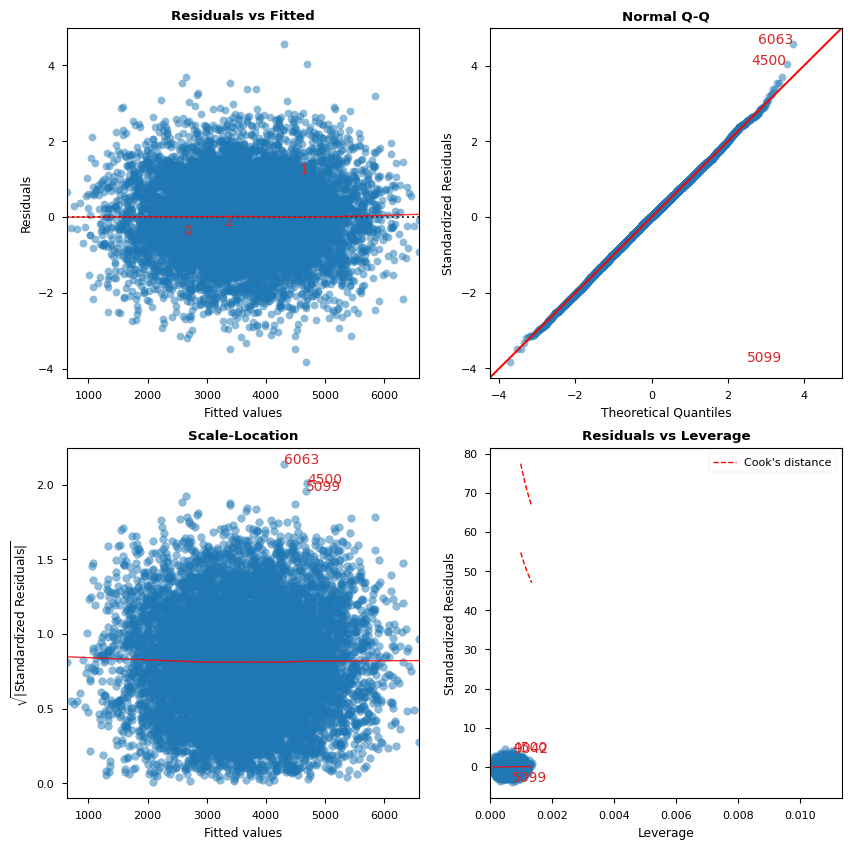

  Features  VIF Factor
5        5        1.00
3        3        1.00
1        1        1.00
4        4        1.00
2        2        1.00
0    const       15.92


In [5]:
cls = modules.statsmodel_original.Linear_Reg_Diagnostic(results)
fig, ax = cls()

In [6]:
# fit

reg = LinearRegression(fit_intercept=True).fit(X, 
                                                df[0])
preds_sk = reg.predict(X)

/home/jan_rathfelder/Development/env_basic/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/jan_rathfelder/Development/env_basic/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [7]:
df['residual'] = df[0] - preds_sk
df['preds'] = preds_sk

In [8]:
ols_ac = modules.ols_assumptions_check.ols_check('ks', 'yyyymm')

In [9]:
df['const']=1

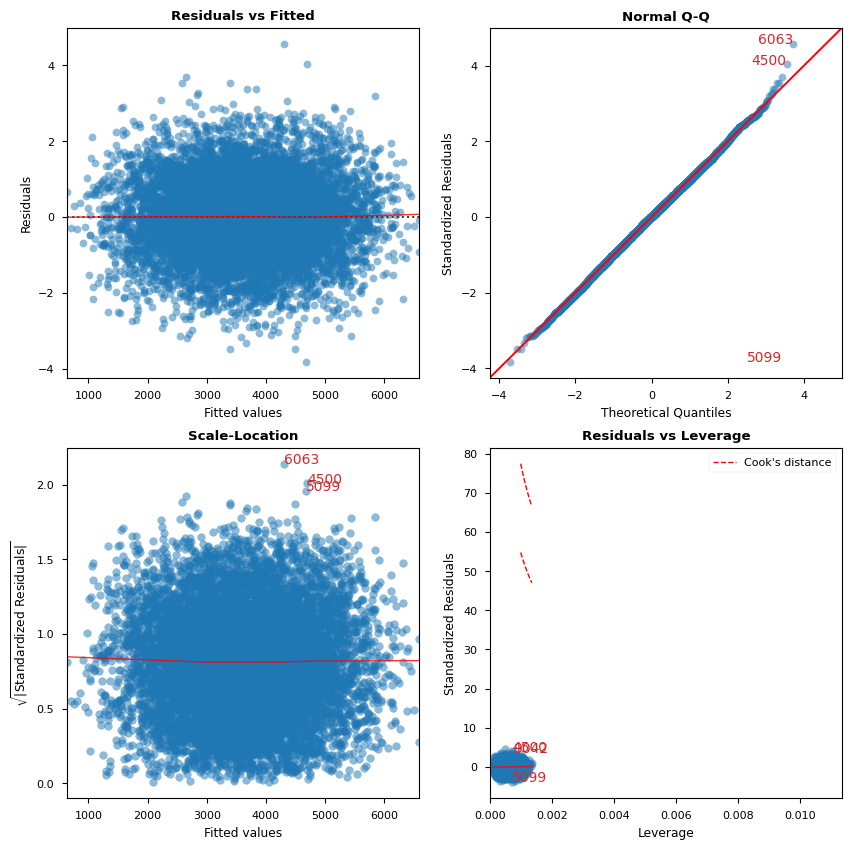

,vif
5,1.000045
3,1.000079
1,1.000114
4,1.000154
2,1.000156
const,15.918479


(<Figure size 1000x1000 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [10]:
ols_ac.show_all_classic_diagnostic_plots(df, 
                                         df.residual,
                                         df.preds,
                                         X.columns,
                                         df[0])